In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.linear_model import LinearRegression

In [4]:
df = pd.read_csv('/content/car data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


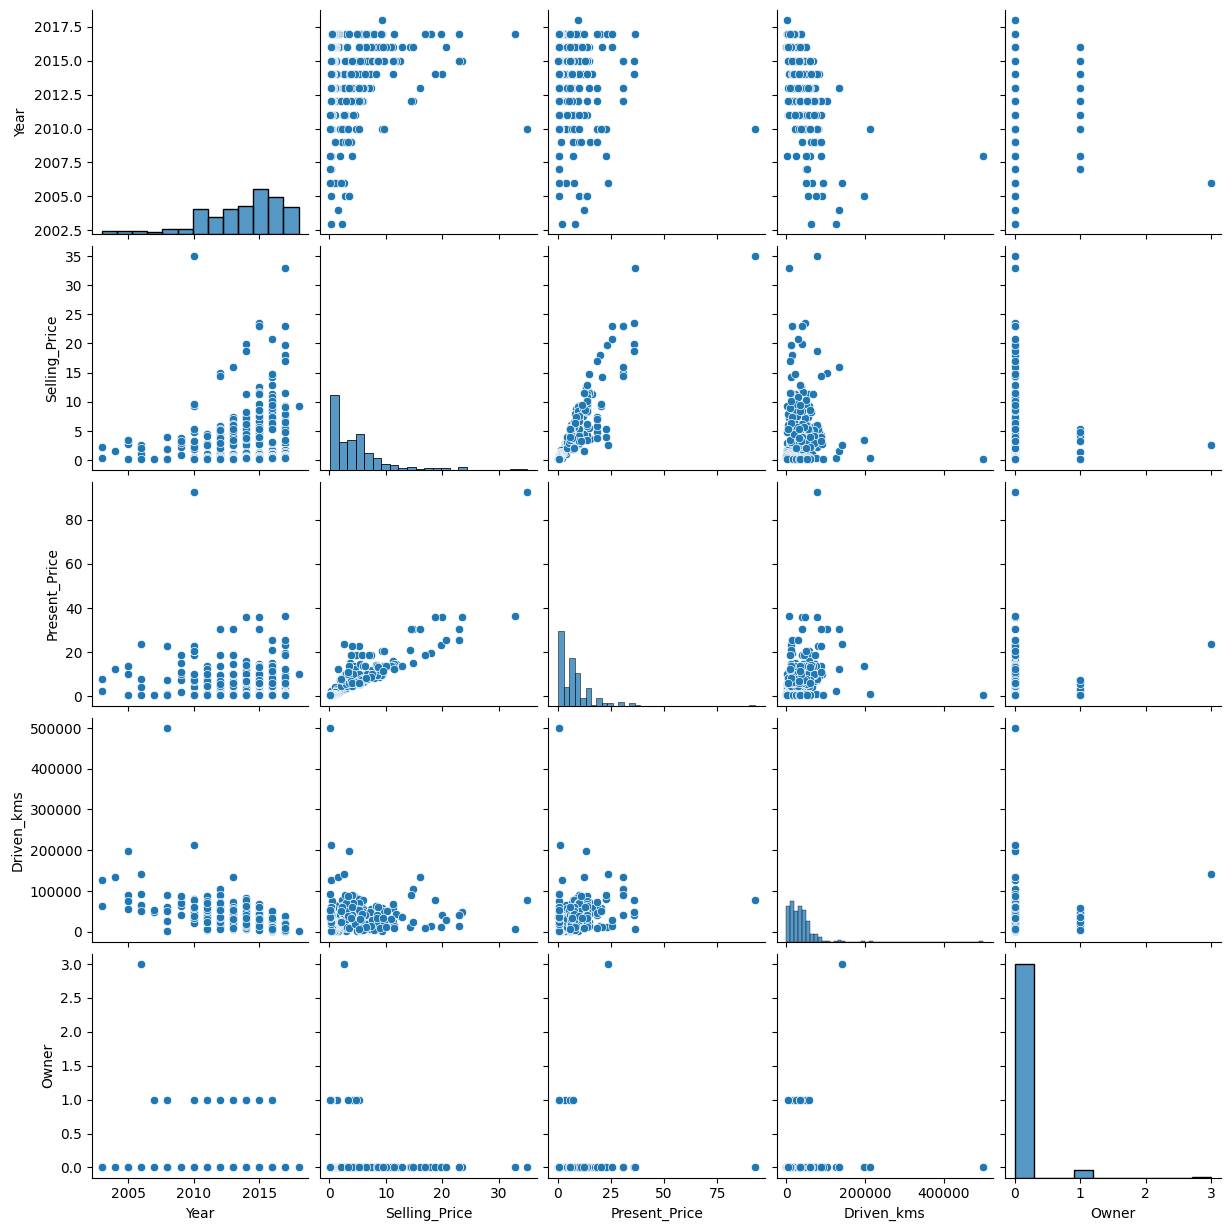

In [7]:
sns.pairplot(df)
plt.show()

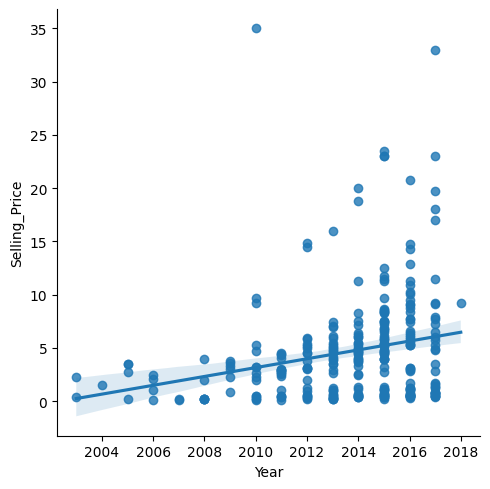

In [8]:
sns.lmplot(x="Year", y="Selling_Price", data=df)
plt.show()

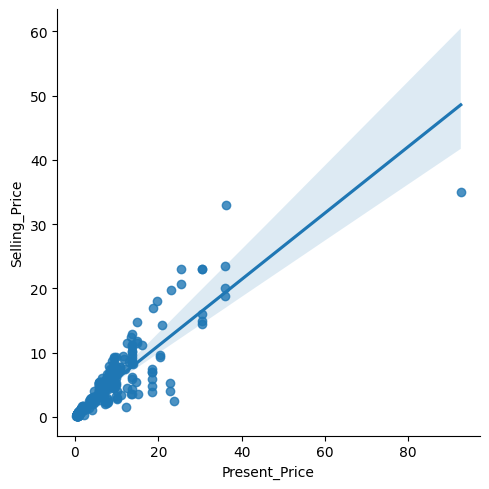

In [9]:
sns.lmplot(x='Present_Price',y="Selling_Price",data=df)

In [10]:
df['Price_difference']=df['Present_Price'] - df['Selling_Price']
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Price_difference
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2.24
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,4.79
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2.60
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,1.30
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2.27


In [11]:
max_dif = df['Price_difference'].idxmax()
print(max_dif)

86


In [12]:
max_dif_car = df.loc[max_dif,"Car_Name"]
max_dif_year = df.loc[max_dif,"Year"]
max_dif_sp = df.loc[max_dif,"Selling_Price"]
max_dif_st = df.loc[max_dif,"Selling_type"]
print('the most price difference car was ',max_dif_car,'and it was sold in',max_dif_year, "with",max_dif_sp,'by a',max_dif_st )

the most price difference car was  land cruiser and it was sold in 2010 with 35.0 by a Dealer


In [13]:
df["Year"].max()

2018

In [14]:
model = LinearRegression()

In [15]:
X = df["Year"].values.reshape(-1, 1)
model.fit(X, df.Selling_Price)

LinearRegression()

In [16]:
import numpy as np

In [17]:
next_10_years = np.arange(2024,2034).reshape(-1,1)
predicted_prices = model.predict(next_10_years)
for year, price in zip(next_10_years.flatten(), predicted_prices):
    print(f"Year: {year}, Predicted Price: {price}")

Year: 2024, Predicted Price: 8.966665351003826
Year: 2025, Predicted Price: 9.381757045639347
Year: 2026, Predicted Price: 9.796848740274868
Year: 2027, Predicted Price: 10.211940434910503
Year: 2028, Predicted Price: 10.627032129546023
Year: 2029, Predicted Price: 11.042123824181544
Year: 2030, Predicted Price: 11.457215518817065
Year: 2031, Predicted Price: 11.872307213452586
Year: 2032, Predicted Price: 12.287398908088107
Year: 2033, Predicted Price: 12.702490602723742


In [18]:
year = np.array([[2019]])
model.predict(year)

array([6.89120688])

In [19]:
df['Selling_Price'].max()

35.0